## Student ID : 23081863
## GitHub Link : https://github.com/AshishKhandekar99/Machine-learning-tutorial


# 1. Setup and Data Preparation

# Decision Trees: Hyperparameter Tuning and Performance Analysis using the Wine Dataset

## Objective
This tutorial explores how different hyperparameters affect the performance of Decision Trees using the Wine dataset. It includes visual aids, code walkthroughs, and performance metrics to demonstrate model behavior and optimal configurations.
## Tools and Libraries
- Python 3.10+
- scikit-learn
- matplotlib
- numpy
- Jupyter Notebook


In [182]:
# Setup
!pip install -q scikit-learn matplotlib numpy

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import (train_test_split, 
                                   GridSearchCV, 
                                   learning_curve,
                                   validation_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, 
                           classification_report,
                           roc_auc_score)
from sklearn.pipeline import Pipeline

In [184]:
# Load data
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names
class_names = wine.target_names

In [185]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 142 samples
Test set: 36 samples


# 2. Hyperparameter Experiments

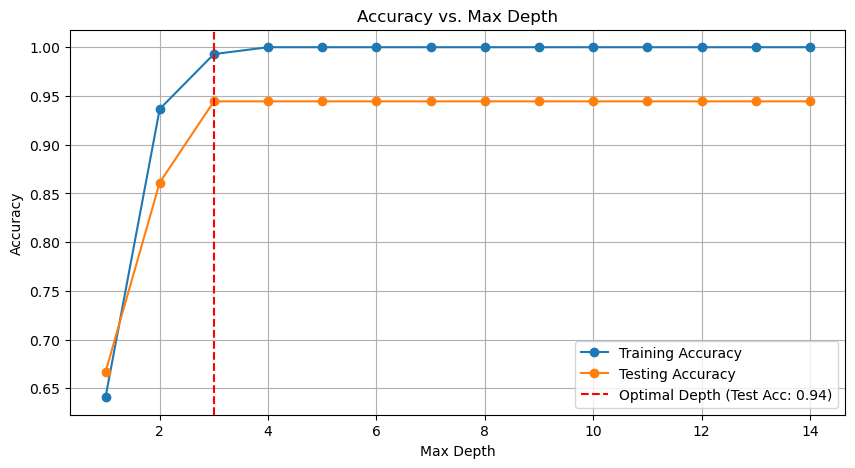

Optimal max_depth: 3
Test Accuracy at Optimal Depth: 94.44%


In [188]:
# Experiment 1: Varying max_depth
depths = range(1, 15)
train_acc = []
test_acc = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))

# Find the optimal max_depth (highest test accuracy)
optimal_depth = depths[np.argmax(test_acc)]
optimal_test_accuracy = max(test_acc)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(depths, train_acc, 'o-', label='Training Accuracy')
plt.plot(depths, test_acc, 'o-', label='Testing Accuracy')
plt.axvline(x=optimal_depth, color='r', linestyle='--', 
            label=f'Optimal Depth (Test Acc: {optimal_test_accuracy:.2f})')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Max Depth')
plt.grid()
plt.show()

# Print the optimal depth and accuracy
print(f"Optimal max_depth: {optimal_depth}")
print(f"Test Accuracy at Optimal Depth: {optimal_test_accuracy:.2%}")

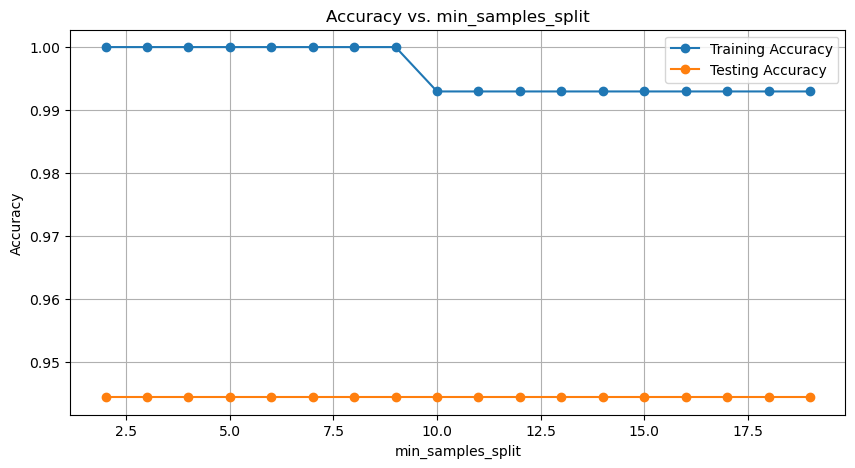

In [189]:
# ### Experiment 2: Varying `min_samples_split`
splits = range(2, 20)
train_acc_split = []
test_acc_split = []

for split in splits:
    clf = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    clf.fit(X_train, y_train)
    train_acc_split.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc_split.append(accuracy_score(y_test, clf.predict(X_test)))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(splits, train_acc_split, 'o-', label='Training Accuracy')
plt.plot(splits, test_acc_split, 'o-', label='Testing Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. min_samples_split')
plt.grid()
plt.show()

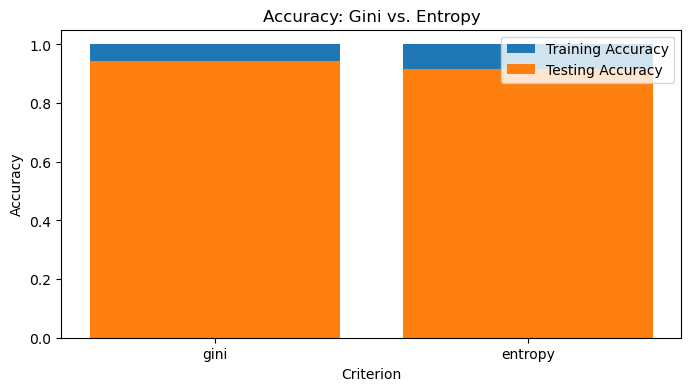

In [190]:
# ### Experiment 3: `criterion` Comparison (Gini vs. Entropy)
criteria = ['gini', 'entropy']
train_acc_crit = []
test_acc_crit = []

for crit in criteria:
    clf = DecisionTreeClassifier(criterion=crit, random_state=42)
    clf.fit(X_train, y_train)
    train_acc_crit.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc_crit.append(accuracy_score(y_test, clf.predict(X_test)))

# Plot results
plt.figure(figsize=(8, 4))
plt.bar(criteria, train_acc_crit, label='Training Accuracy')
plt.bar(criteria, test_acc_crit, label='Testing Accuracy')
plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy: Gini vs. Entropy')
plt.show()

# 3. Advanced Hyperparameter Experiments

In [192]:
# Experiment 1: Model Complexity Analysis
# Varying `max_depth` with cost-complexity pruning

# Define parameter ranges
param_grid = {
    'max_depth': [None, 3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]  # Pruning strength
}

# Initialize GridSearchCV
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(
    clf, param_grid, cv=5, scoring='accuracy',
    n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)

# Print best parameters
best_params = grid_search.best_params_
print("\n=== Optimal Parameters ===")
print(f"max_depth: {best_params.get('max_depth')}")
print(f"min_samples_split: {best_params.get('min_samples_split', 2)}")
print(f"ccp_alpha: {best_params.get('ccp_alpha', 0.0)}")
print(f"CV Accuracy: {grid_search.best_score_:.2%}")

Fitting 5 folds for each of 112 candidates, totalling 560 fits

=== Optimal Parameters ===
max_depth: None
min_samples_split: 10
ccp_alpha: 0.0
CV Accuracy: 92.24%


In [193]:
# Experiment 2: Feature Engineering Impact
# Compare raw vs. PCA-transformed features

# Create pipeline with PCA
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Keep 95% variance
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Extended parameter grid
param_grid_pca = {
    'pca__n_components': [None, 0.8, 0.95],  # Test PCA impact
    'clf__max_depth': [None, 5, 10],
    'clf__ccp_alpha': [0.0, 0.01, 0.1]
}

# Run GridSearchCV
grid_search_pca = GridSearchCV(
    pipe, param_grid_pca, cv=5, 
    n_jobs=-1, verbose=1
)
grid_search_pca.fit(X_train, y_train)

print("\n=== PCA Results ===")
print(f"Best n_components: {grid_search_pca.best_params_['pca__n_components']}")
print(f"PCA CV Accuracy: {grid_search_pca.best_score_:.2%}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

=== PCA Results ===
Best n_components: 0.8
PCA CV Accuracy: 95.81%


# 4. Model Evaluation and Visualization

In [195]:
# Advanced metrics beyond accuracy
# Train best model
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predictions
y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)

# Print metrics
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=class_names))

print("\n=== ROC-AUC Score ===")
print(f"OvO ROC-AUC: {roc_auc_score(y_test, y_proba, multi_class='ovo'):.2%}")


=== Classification Report ===
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


=== ROC-AUC Score ===
OvO ROC-AUC: 95.58%


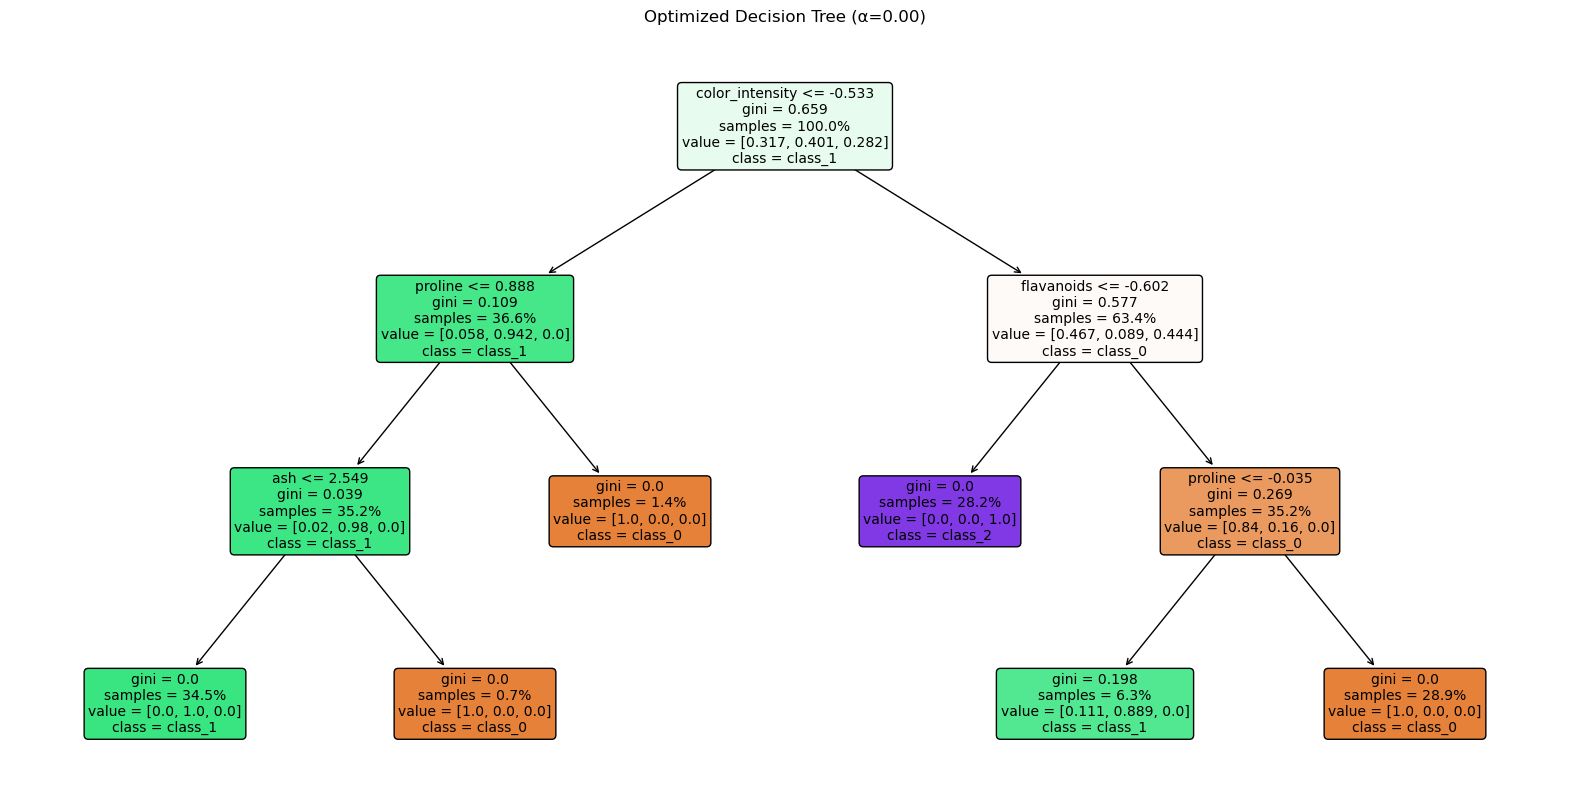

In [196]:
# Decision Tree Visualization With cost-complexity pruning markers
plt.figure(figsize=(20, 10))
plot_tree(
    best_clf,
    filled=True,
    feature_names=feature_names,
    class_names=class_names,
    proportion=True,
    rounded=True,
    fontsize=10
)
plt.title(f"Optimized Decision Tree (α={best_params.get('ccp_alpha', 0.0):.2f})")
plt.show()

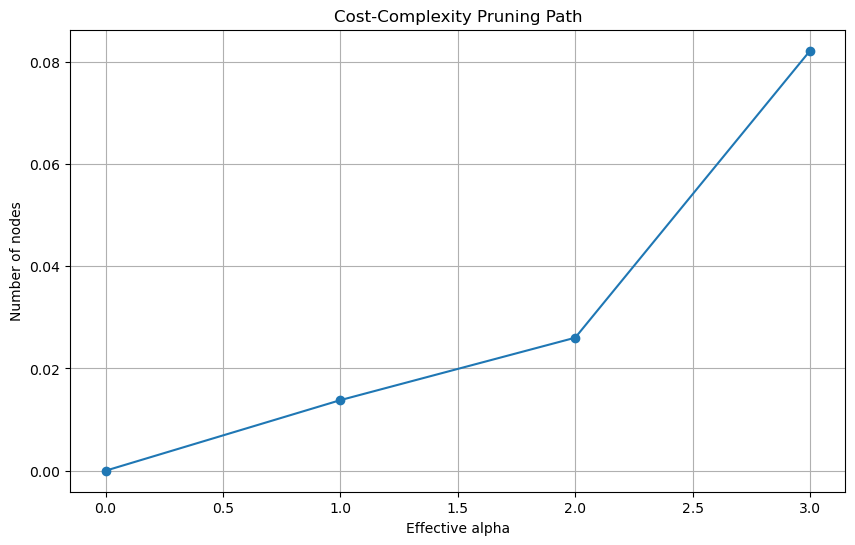

In [197]:
# Pruning Path Analysis
# Visualize how ccp_alpha affects tree complexity

path = best_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], "o-")
plt.xlabel("Effective alpha")
plt.ylabel("Number of nodes")
plt.title("Cost-Complexity Pruning Path")
plt.grid(True)
plt.show()

# 5. Learning Curves and Validation

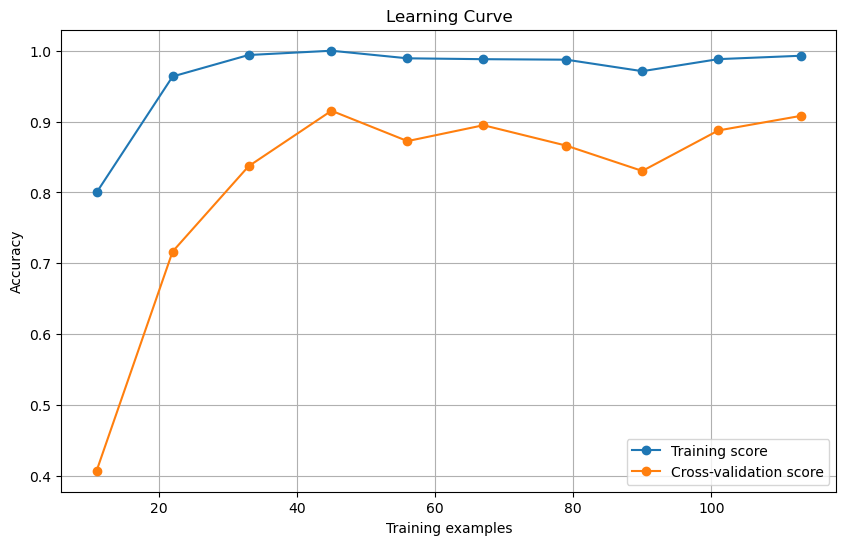

In [199]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_clf, X_train, y_train, cv=5,
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.grid(True)
plt.show()

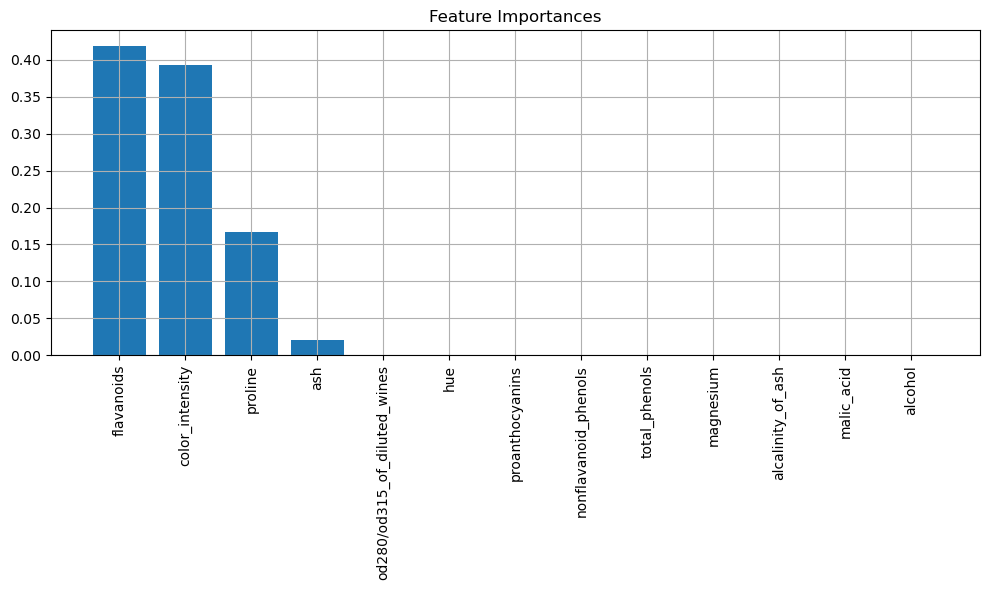

In [200]:
# Train a final model
final_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
final_model.fit(X_train, y_train)

# Plot feature importances
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.grid()
plt.show()

# 6. Final Model Evaluation

In [202]:
# Consolidated performance report
print("\n=== Final Model Performance ===")
print(f"Training Accuracy: {best_clf.score(X_train, y_train):.2%}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"Number of Nodes: {best_clf.tree_.node_count}")
print(f"Tree Depth: {best_clf.tree_.max_depth}")


=== Final Model Performance ===
Training Accuracy: 99.30%
Test Accuracy: 94.44%
Number of Nodes: 11
Tree Depth: 3



# References Section:
- Scikit-learn Documentation: https://scikit-learn.org/stable/modules/tree.html
- "An Introduction to Statistical Learning" – Gareth James et al.
- Wine Dataset: https://archive.ics.uci.edu/ml/datasets/wine
- Breiman, L. (1984). *Classification and Regression Trees*. CRC Press.
- Lee, J. (2021). "Mastering Decision Trees". *Towards Data Science*.  

## Reproducibility
This notebook can be rerun as-is using Jupyter or Google Colab. Ensure all packages are installed and follow the structure step-by-step.
